# Common Nonstationary to Stationary Transformations
Feb 21st 2022

In [3]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from src.timeseriesFunctions import plot_time_series, chunks_statistics
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose
# Config:
SEED= 42

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series_forecasting/time_series_analysis/week_2/1_stationairy_time_series


In [4]:
import src.colorsetup

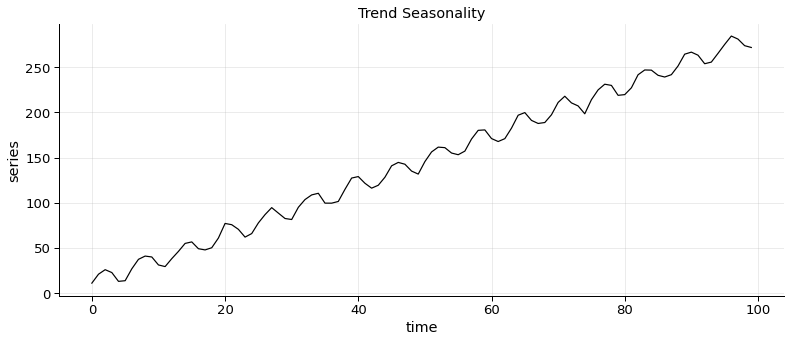

In [5]:
np.random.seed(SEED)

#data
time= np.arange(100)
stationary= np.random.normal(loc= 0, scale= 1.0, size= len(time))
trend= (time * 2.75) + stationary
seasonality= 10 + np.sin(time)*10

trend_seasonality= trend + seasonality + stationary
plot_time_series(time, trend_seasonality, title= "Trend Seasonality")

In [6]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", np.round(adf_b4, 4))
print("p-value: ", np.round(pvalue_b4, 4))

ADF:  0.294
p-value:  0.9771


## Exercise 1: Remove Trend & Seasonality with Statsmodels

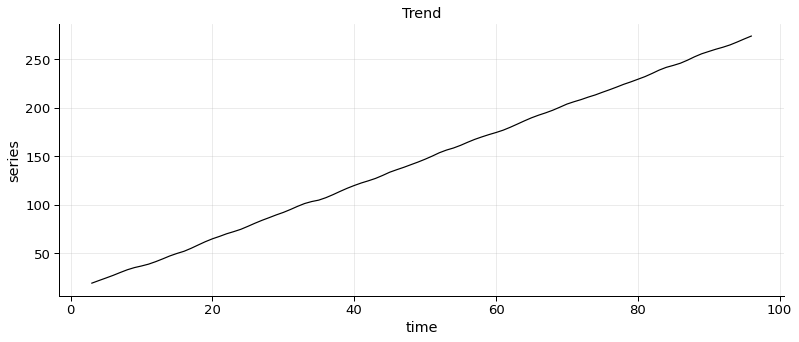

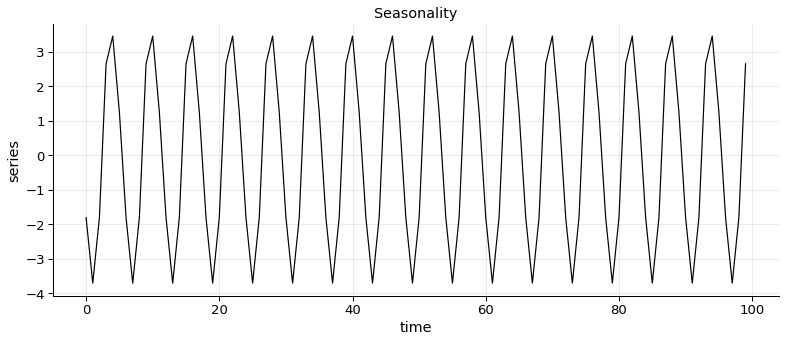

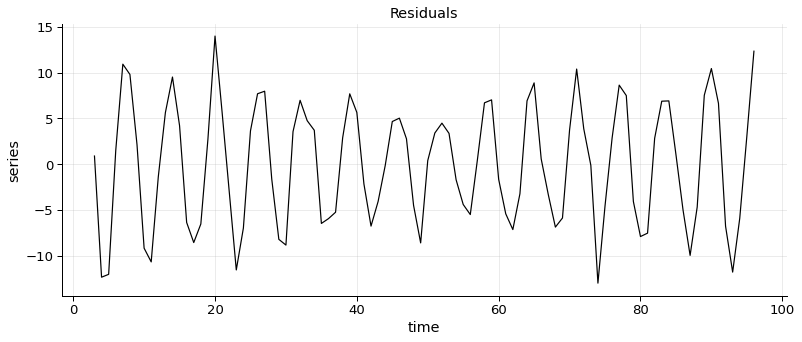

In [7]:
ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid
plot_time_series(time, est_trend, title= "Trend")
plt.show()
plot_time_series(time, est_seasonal, title= "Seasonality")
plt.show()
plot_time_series(time, est_residual, title= "Residuals")

In [8]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", np.round(adf_after,4))
print("p-value: ", np.round(pvalue_after, 6))

ADF:  -5.672
p-value:  1e-06


## Exercise 2: Remove chaing variance w/log transformation

## Exercise 3: Removing Autocrrelation with Differencing

## Exercise 4: Do it with example data

In [9]:
mytime= np.arange(100)
data_path= "../course_data/"
dataset_1= np.load(data_path + "dataset_SNS_1.npy")
dataset_2= np.load(data_path + "dataset_SNS_2.npy")

Dataset 1

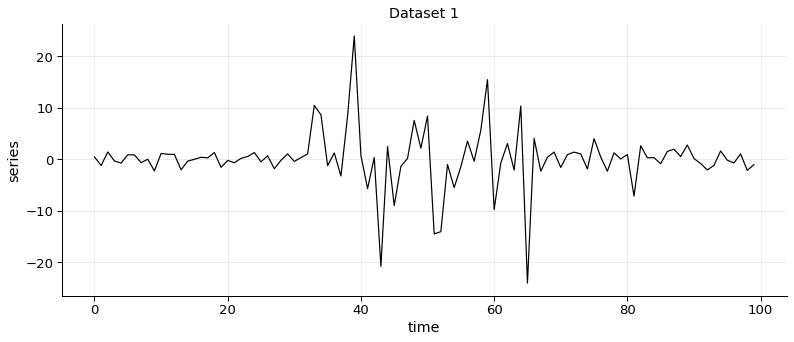

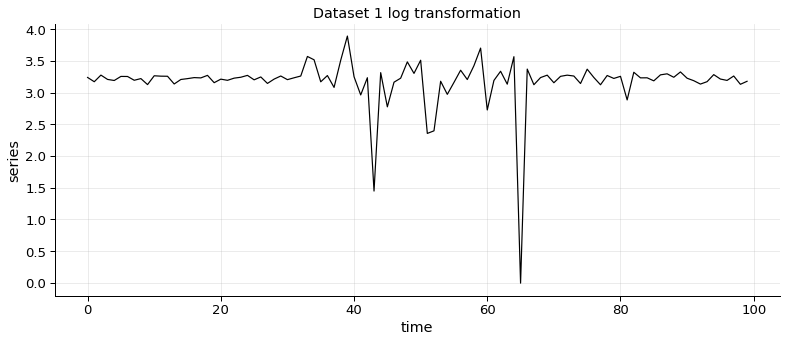

In [10]:
plot_time_series(mytime, dataset_1, title= "Dataset 1")
log_dataset1= np.log(dataset_1+25)
plt.show()
plot_time_series(mytime, log_dataset1, title= "Dataset 1 log transformation")

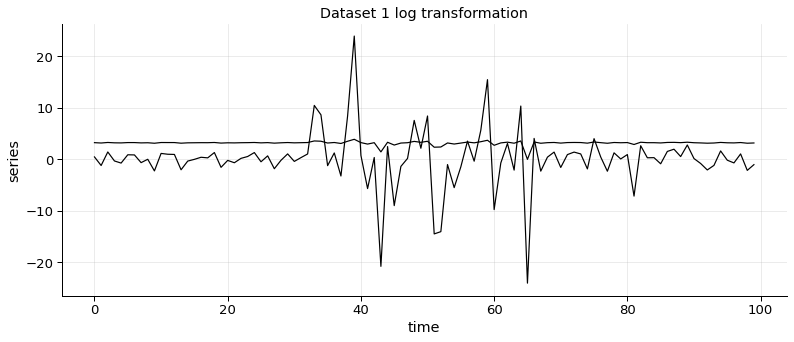

In [11]:
plot_time_series(mytime, dataset_1, title= "Dataset 1")
plot_time_series(mytime, log_dataset1, title= "Dataset 1 log transformation")

Dataset 2

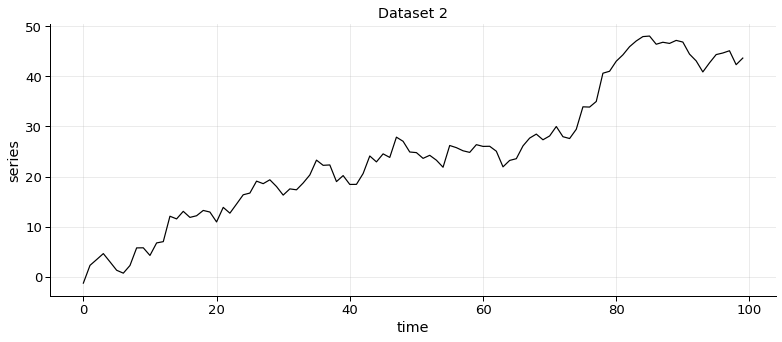

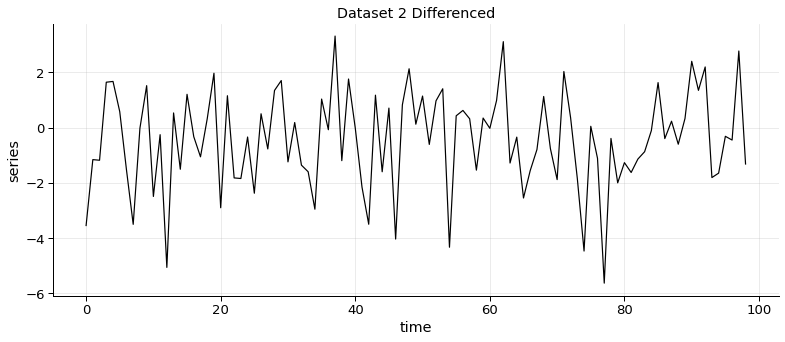

In [12]:
plot_time_series(mytime, dataset_2, title= "Dataset 2")
plt.show()
# Removing autocorrelation with differencing
dataset2_diff= dataset_2[:-1] - dataset_2[1:]
plot_time_series(mytime[:-1], dataset2_diff, title= "Dataset 2 Differenced")

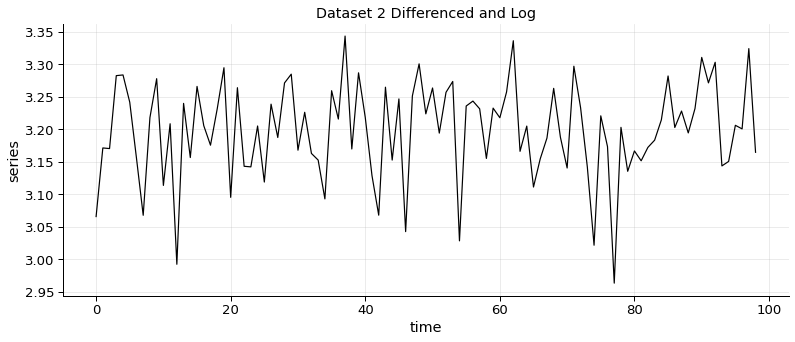

In [13]:
tmp= np.log(dataset2_diff+25)
plot_time_series(mytime[:-1], tmp, title= "Dataset 2 Differenced and Log")

In [14]:
chunks1= np.split(log_dataset1, indices_or_sections= 10)
print("Dataset 1:")
chunks_statistics(chunks1)
chunks_2= np.split(dataset2_diff, indices_or_sections= 9)
print("")
print("Dataset 2:")
chunks_statistics(chunks_2)

chunks_3= np.split(tmp, indices_or_sections= 9)
print("")
print("Dataset 2: Diff and log")
chunks_statistics(chunks_3)

Dataset 1:
Chunk | Mean    | Variance
--------------------------
    1 | 3.2122 | 0.00182641
    2 | 3.22276 | 0.00191978
    3 | 3.22014 | 0.00124754
    4 | 3.36951 | 0.0544011
    5 | 3.01519 | 0.307818
    6 | 3.12476 | 0.177573
    7 | 2.89445 | 0.975857
    8 | 3.23017 | 0.00491835
    9 | 3.22428 | 0.0146205
   10 | 3.19678 | 0.00221582

Dataset 2:
Chunk | Mean    | Variance
--------------------------
    1 | -0.728696 | 3.49815
    2 | -0.539015 | 3.77394
    3 | -0.54679 | 1.65347
    4 | -0.382274 | 4.05401
    5 | -0.296924 | 4.27487
    6 | 0.00731073 | 2.01011
    7 | -0.804602 | 2.74966
    8 | -1.05204 | 2.99322
    9 | 0.265402 | 2.53348

Dataset 2: Diff and log
Chunk | Mean    | Variance
--------------------------
    1 | 3.18629 | 0.00604082
    2 | 3.19373 | 0.00692538
    3 | 3.19539 | 0.00272338
    4 | 3.20012 | 0.00668778
    5 | 3.2032 | 0.00768768
    6 | 3.21757 | 0.00319104
    7 | 3.18375 | 0.00488821
    8 | 3.17307 | 0.00585248
    9 | 3.22747 | 0.0039147


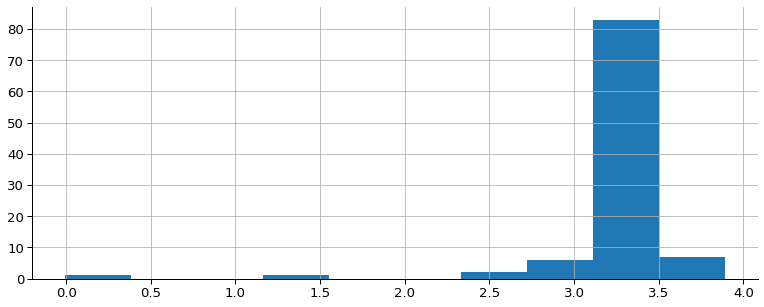

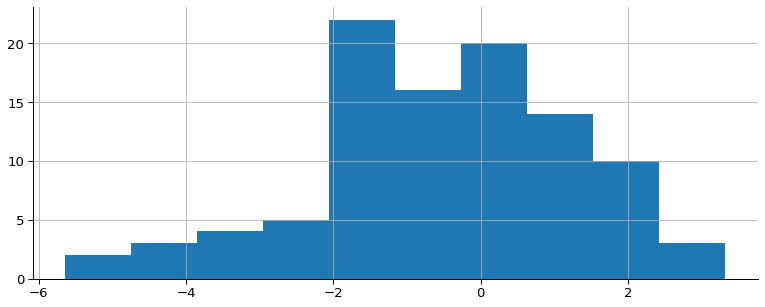

In [15]:
pd.Series(log_dataset1).hist()
plt.show()
pd.Series(dataset2_diff).hist()
plt.show()

Agumented Dickey-Fuller test

In [16]:
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(log_dataset1)
print("Dataset 1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

Dataset 1
ADF:  -10.750411172845046
p-value: 2.674288989362179e-19
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [17]:
adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset2_diff)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -10.280042396185916
p-value: 3.8006628429668026e-18
crit values:  {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


In [19]:
adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(tmp)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -10.33918071742001
p-value: 2.7133928206572273e-18
crit values:  {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


In [20]:
import session_info
session_info.show()